In [0]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, StringType,BooleanType,DateType,DecimalType

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()


In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, DateType

ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),  # Unique ID for an IPL Match
    StructField("over_id", IntegerType(), True),   # Unique over in an innings
    StructField("ball_id", IntegerType(), True),   # Unique ball in an over
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])


In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType

match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # stored as int, since Spark doesn't have YearType
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])


In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType

player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])


In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType, BooleanType, DoubleType

player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DoubleType(), True),  # decimal stored as DoubleType in Spark
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  # no native YearType in Spark
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])


In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])


In [0]:
ball_by_ball = spark.read.schema(ball_by_ball_schema).format("csv").option("header", "true").load("s3://test6006-v2/Ball_By_Ball.csv")

In [0]:
ball_by_ball.show(2)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
match =  spark.read.schema(match_schema).format("csv").option("header", "true").load("s3://test6006-v2/Match.csv")

In [0]:
player =  spark.read.schema(player_schema).format("csv").option("header", "true").load("s3://test6006-v2/Player.csv")

In [0]:
player.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|
+---------+---------+-----------+----+--------------+----------------+------------+
|        0|        1| SC Ganguly|NULL| Left-hand bat|Right-arm medium|       India|
|        1|        2|BB McCullum|NULL|Right-hand bat|Right-arm medium| New Zealand|
+---------+---------+-----------+----+--------------+----------------+------------+
only showing top 2 rows


In [0]:

player_match2 =  spark.read.schema(player_match_schema).format("csv").option("header", "true").load("s3://test6006-v2/Player_match.csv")

In [0]:
player_match2.show(2)

+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|     bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|             -1|           -1.

In [0]:
player_match2.head()

Row(player_match_sk=-1, playermatch_key=-1.0, match_id=-1, player_id=-1, player_name='N/A', dob=None, batting_hand=None, bowling_skill=None, country_name=None, role_desc=None, player_team=None, opposit_team=None, season_year=None, is_manofthematch=None, age_as_on_match=None, isplayers_team_won=None, batting_status=None, bowling_status=None, player_captain=None, opposit_captain=None, player_keeper=None, opposit_keeper=None)

In [0]:
from pyspark.sql.functions import col,when,sum,avg,row_number

# Filter for valid deliveries (no wides and no no-balls)
ball_by_ball = ball_by_ball.filter(
    (col("wides") == 0) & 
    (col("noballs") == 0)
)


In [0]:
from pyspark.sql.functions import sum, avg

# Aggregation: total and average runs scored in each match and innings
total_and_avg_runs = ball_by_ball.groupBy("match_id", "innings_no") \
    .agg(
        sum("runs_scored").alias("total_runs"),
        avg("runs_scored").alias("avg_runs")
    )


In [0]:
from pyspark.sql.window import Window
from pyspark.sql.functions import sum

# Define window spec
windowspec = Window.partitionBy("match_id", "innings_no").orderBy("over_id")

# Add running total of runs_scored per match and innings
ball_by_ball = ball_by_ball.withColumn(
    "row_number",  # or "running_total_runs"
    sum("runs_scored").over(windowspec)
)


In [0]:
from pyspark.sql.functions import when, col

ball_by_ball = ball_by_ball.withColumn(
    "Criteria",
    when(
        (col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket")),
        True
    ).otherwise(False)
)


In [0]:
from pyspark.sql.functions import year, month, dayofmonth


In [0]:
match= match.withColumn("year_of_match_date",year("match_date"))
match = match.withColumn("month_of_match_date",month("match_date"))
match = match.withColumn(" day",dayofmonth("match_date"))
                      

In [0]:
match = match.withColumn("Criteria",
                         when (col("win_margin") > 100 ,"High")
                         .when (col("win_margin") > 50 ,"Medium")
                         .when (col("win_margin") > 0 ,"Low")
                         .otherwise("No Match  ")
)

In [0]:
match = match.withColumn("Toss_winner ",
                         when (col("toss_winner") ==  col("match_winner"),"Yes")
                         .otherwise("no"))

In [0]:
match.show(2)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|Toss_winner |
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      NULL|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|BB McCullum|       140|         1|          

In [0]:
from pyspark.sql.functions import col

In [0]:

Mumbai_matches = match.filter(col("venue_name") == "Wankhede Stadium")
Mumbai_matches.show()

+--------+--------+--------------------+--------------------+----------+-----------+----------------+---------+------------+--------------------+--------------------+---------+--------+------------+---------------+----------+----------+------------------+-------------------+----+--------+------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|      venue_name|city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|      manofmach|win_margin|country_id|year_of_match_date|month_of_match_date| day|Criteria|Toss_winner |
+--------+--------+--------------------+--------------------+----------+-----------+----------------+---------+------------+--------------------+--------------------+---------+--------+------------+---------------+----------+----------+------------------+-------------------+----+--------+------------+
|       3|  335990|      Mumbai Indians|Royal Challengers...|      NULL|       2008|Wankhed

In [0]:
Mumbai_matches = Mumbai_matches.withColumn("Probablties",
                                           when ((col("toss_winner")== col("match_winner"))& (col("toss_name") == "bat"),"Home_Advantage")
                                           .otherwise("No_home_advantage")
                                           )
Mumbai_matches.show()

+--------+--------+--------------------+--------------------+----------+-----------+----------------+---------+------------+--------------------+--------------------+---------+--------+------------+---------------+----------+----------+------------------+-------------------+----+--------+------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|      venue_name|city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|      manofmach|win_margin|country_id|year_of_match_date|month_of_match_date| day|Criteria|Toss_winner |      Probablties|
+--------+--------+--------------------+--------------------+----------+-----------+----------------+---------+------------+--------------------+--------------------+---------+--------+------------+---------------+----------+----------+------------------+-------------------+----+--------+------------+-----------------+
|       3|  335990|      Mumbai India

In [0]:
from pyspark.sql.functions import col, count

match_played = (
    match
    .filter(col("season_year") == 2017)                     # filter for 2017
    .groupBy(col("manofmach").alias("player"))             # group by MOM winner
    .agg(count("*").alias("count"))                         # count matches
    .orderBy(col("count").desc())                           # sort descending
)

match_played.show()


+----------------+-----+
|          player|count|
+----------------+-----+
| NM Coulter-Nile|    3|
|       BA Stokes|    3|
|          AJ Tye|    2|
|      RV Uthappa|    2|
|       KH Pandya|    2|
|      JD Unadkat|    2|
|  Sandeep Sharma|    2|
|     Rashid Khan|    2|
|          N Rana|    2|
|        DR Smith|    1|
|       SV Samson|    1|
|      KA Pollard|    1|
|       RG Sharma|    1|
|   KS Williamson|    1|
|  MJ McClenaghan|    1|
|       G Gambhir|    1|
|       MM Sharma|    1|
|Wasington Sundar|    1|
|       SPD Smith|    1|
|     LH Ferguson|    1|
+----------------+-----+
only showing top 20 rows


In [0]:
# If 'match' is your DataFrame in PySpark:
match.createOrReplaceTempView("match")


In [0]:
most_mom_awards_2017 = spark.sql("""
    SELECT manofmach AS player_name,
           COUNT(*) AS awards_count
    FROM match
    WHERE season_year = 2017
    GROUP BY manofmach
    ORDER BY awards_count DESC
""")


In [0]:
most_mom_awards_2017.show(5)


+---------------+------------+
|    player_name|awards_count|
+---------------+------------+
|      BA Stokes|           3|
|NM Coulter-Nile|           3|
|         N Rana|           2|
|    Rashid Khan|           2|
|      KH Pandya|           2|
+---------------+------------+
only showing top 5 rows


In [0]:
from pyspark.sql.functions import lower,regexp_replace

player = player.withColumn("player_name",lower(regexp_replace("player_name","[^a-zA-Z0-9]","")))

In [0]:
player = player.na.fill(
    {"batting_hand": "Unknown","bowling_skill": "Unknown"})


In [0]:
player = player.withColumn("batting_style",
                           when(col("batting_hand").contains("left"),"left_handed")
                           .otherwise("right_handed"))

In [0]:
player.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| SC Ganguly|NULL| Left-hand bat|Right-arm medium|       India| right_handed|
|        1|        2|BB McCullum|NULL|Right-hand bat|Right-arm medium| New Zealand| right_handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows


In [0]:
from pyspark.sql.functions import col,when ,current_date,expr

player_match = player_match.withColumn("veteran_status",
                                       when(col("age_as_on_match")>=35,"Veteran")
                                       .otherwise("Non-vetran"))

In [0]:
player_match = player_match.withColumn(
    "years_since-debut",
    (year(current_date() -col("season_year"))))


In [0]:
player_match.printSchema()


root
 |-- player_sk: integer (nullable = true)
 |-- player_id: integer (nullable = true)
 |-- player_name: string (nullable = true)
 |-- dob: date (nullable = true)
 |-- batting_hand: string (nullable = true)
 |-- bowling_skill: string (nullable = true)
 |-- country_name: string (nullable = true)



In [0]:
# If 'match' is your DataFrame in PySpark:
ball_by_ball.createOrReplaceTempView("ball_by_ball")
player_match.createOrReplaceTempView("player_match2")
player.createOrReplaceTempView("player")
# If 'match' is your DataFrame in PySpark:
match.createOrReplaceTempView("match")




In [0]:
player_match2.show(2)

+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|     bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|             -1|           -1.

In [0]:
player.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|
+---------+---------+-----------+----+--------------+----------------+------------+
|        0|        1| SC Ganguly|NULL| Left-hand bat|Right-arm medium|       India|
|        1|        2|BB McCullum|NULL|Right-hand bat|Right-arm medium| New Zealand|
+---------+---------+-----------+----+--------------+----------------+------------+
only showing top 2 rows


In [0]:

top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match2 pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

In [0]:
top_scoring_batsmen_per_season.show()

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     SE Marsh|       2008|       616|
|    G Gambhir|       2008|       534|
|ST Jayasuriya|       2008|       514|
|    SR Watson|       2008|       468|
|     GC Smith|       2008|       441|
| AC Gilchrist|       2008|       436|
|    YK Pathan|       2008|       435|
|     SK Raina|       2008|       421|
|     MS Dhoni|       2008|       414|
|     V Sehwag|       2008|       406|
|    RG Sharma|       2008|       404|
|     R Dravid|       2008|       371|
|   SC Ganguly|       2008|       349|
|     S Dhawan|       2008|       340|
|   RV Uthappa|       2008|       320|
|KC Sangakkara|       2008|       320|
|    DJ Hussey|       2008|       319|
|  SA Asnodkar|       2008|       311|
|     PA Patel|       2008|       302|
| Yuvraj Singh|       2008|       299|
+-------------+-----------+----------+
only showing top 20 rows


In [0]:
# economical bowlers in powerplay 

economical_bowlers = spark.sql("""
    SELECT p.player_name,AVG(b.runs_scored) as average_runs_Scored
    from ball_by_ball b
    join player_match2 pm on b.match_id = pm.match_id and b.bowler = pm.player_id
    join player p on p.player_id = pm.player_id
    where b.over_id <= 6
    group by p.player_name
    order by average_runs_Scored 
""")
economical_bowlers.show(10)


+-----------+-------------------+
|player_name|average_runs_Scored|
+-----------+-------------------+
| SM Harwood| 0.3157894736842105|
|    A Zampa|0.42857142857142855|
| Ankit Soni|                0.5|
|   AJ Finch|                0.5|
| Avesh Khan|                0.5|
|  GR Napier|                0.5|
|   NB Singh|               0.56|
| AG Murtaza| 0.6455696202531646|
| FH Edwards| 0.6585365853658537|
|  SB Bangar| 0.6666666666666666|
+-----------+-------------------+
only showing top 10 rows


In [0]:
toss_impact_mumbai = spark.sql("""
    SELECT 
        m.match_id, 
        m.toss_winner,
        m.match_winner,
        m.toss_name,
        CASE 
            WHEN m.toss_winner = m.match_winner THEN 'WON' 
            ELSE 'LOST' 
        END AS toss_impact
    FROM `match` m
    WHERE m.toss_winner IS NOT NULL and m.season_year = 2008 AND ( m.team1 = 'Mumbai Indians' or m.team2 = 'Mumbai Indians') 
""")

toss_impact_mumbai.show(10)


+--------+--------------------+--------------------+---------+-----------+
|match_id|         toss_winner|        match_winner|toss_name|toss_impact|
+--------+--------------------+--------------------+---------+-----------+
|  335990|      Mumbai Indians|Royal Challengers...|      bat|       LOST|
|  335994|      Mumbai Indians| Chennai Super Kings|    field|       LOST|
|  335996|      Mumbai Indians|     Kings XI Punjab|    field|       LOST|
|  335999|     Deccan Chargers|     Deccan Chargers|    field|        WON|
|  336002|Kolkata Knight Ri...|      Mumbai Indians|      bat|       LOST|
|  336009|    Delhi Daredevils|      Mumbai Indians|    field|       LOST|
|  336013|      Mumbai Indians|      Mumbai Indians|    field|        WON|
|  336017|      Mumbai Indians|      Mumbai Indians|    field|        WON|
|  336023|      Mumbai Indians|      Mumbai Indians|    field|        WON|
|  336026|      Mumbai Indians|      Mumbai Indians|    field|        WON|
+--------+---------------

In [0]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match2 pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins ASC
""")
average_runs_in_wins.show()

+---------------+-------------------+--------------+
|    player_name|   avg_runs_in_wins|innings_played|
+---------------+-------------------+--------------+
|       TS Mills|                0.0|             3|
|      JJ Bumrah|                0.0|             3|
|       VR Aaron|                0.0|             5|
|      SN Thakur|                0.0|             2|
|        A Nehra|                0.0|             2|
|SMSM Senanayake|                0.0|             1|
|       I Sharma|                0.0|             1|
|       J Theron|                0.0|             2|
|  Anirudh Singh|                0.0|             1|
|     KP Appanna|                0.0|             1|
|     T Thushara|                0.2|             5|
|      SA Abbott|               0.25|             4|
|  Yashpal Singh|                0.3|            20|
|    S Sreesanth| 0.3333333333333333|             3|
|    KC Cariappa| 0.3333333333333333|             3|
|     JD Unadkat|                0.4|         

In [0]:
toss_impact_all= spark.sql("""
    SELECT 
        m.match_id, 
        m.toss_winner,
        m.match_winner,
        m.toss_name,
        CASE 
            WHEN m.toss_winner = m.match_winner THEN 'WON' 
            ELSE 'LOST' 
        END AS toss_impact
    FROM `match` m
    WHERE m.toss_winner IS NOT NULL 
""")

toss_impact_all.show(10)


+--------+--------------------+--------------------+---------+-----------+
|match_id|         toss_winner|        match_winner|toss_name|toss_impact|
+--------+--------------------+--------------------+---------+-----------+
|  335987|Royal Challengers...|Kolkata Knight Ri...|    field|       LOST|
|  335988| Chennai Super Kings| Chennai Super Kings|      bat|        WON|
|  335989|    Rajasthan Royals|    Delhi Daredevils|      bat|       LOST|
|  335990|      Mumbai Indians|Royal Challengers...|      bat|       LOST|
|  335991|     Deccan Chargers|Kolkata Knight Ri...|      bat|       LOST|
|  335992|     Kings XI Punjab|    Rajasthan Royals|      bat|       LOST|
|  335993|     Deccan Chargers|    Delhi Daredevils|      bat|       LOST|
|  335994|      Mumbai Indians| Chennai Super Kings|    field|       LOST|
|  335995|    Rajasthan Royals|    Rajasthan Royals|    field|        WON|
|  335996|      Mumbai Indians|     Kings XI Punjab|    field|       LOST|
+--------+---------------

In [0]:
average_runs_in_wins
top_scoring_batsmen_per_season

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-6109541542822225>, line 2
      1 average_runs_in_wins
----> 2 toss_impact_mumbai
      3 toss_impact_all
      4 economical_bowlers

NameError: name 'toss_impact_mumbai' is not defined

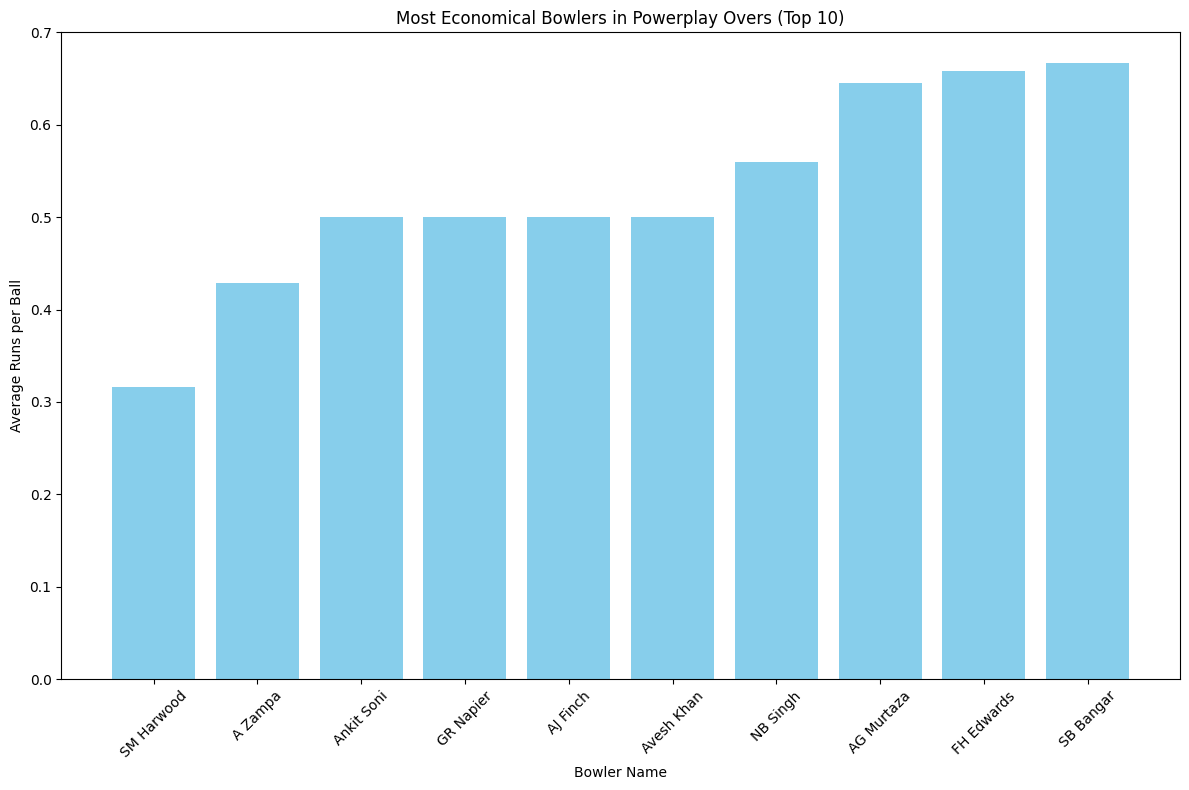

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to Pandas only if it's still a Spark DataFrame
if not isinstance(economical_bowlers, pd.DataFrame):
    economical_bowlers = economical_bowlers.toPandas()

# Get top 10 most economical bowlers
top_economical_bowlers = economical_bowlers.nsmallest(10, 'average_runs_Scored')

# Plot
plt.figure(figsize=(12, 8))
plt.bar(top_economical_bowlers['player_name'], 
        top_economical_bowlers['average_runs_Scored'], 
        color='skyblue')

plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


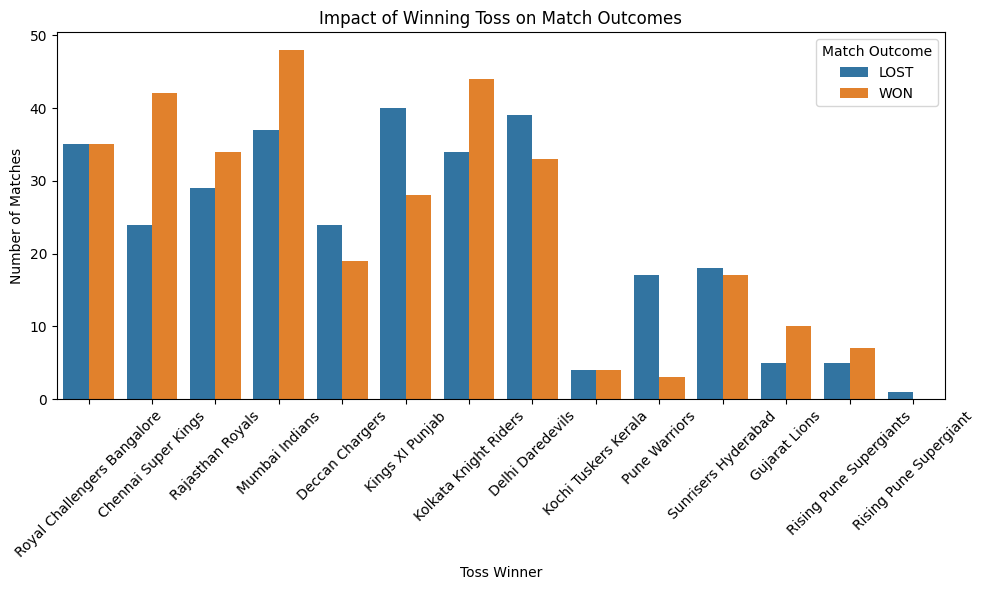

In [0]:
import seaborn as sns
toss_impact_pd = toss_impact_all.toPandas()
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='toss_impact', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


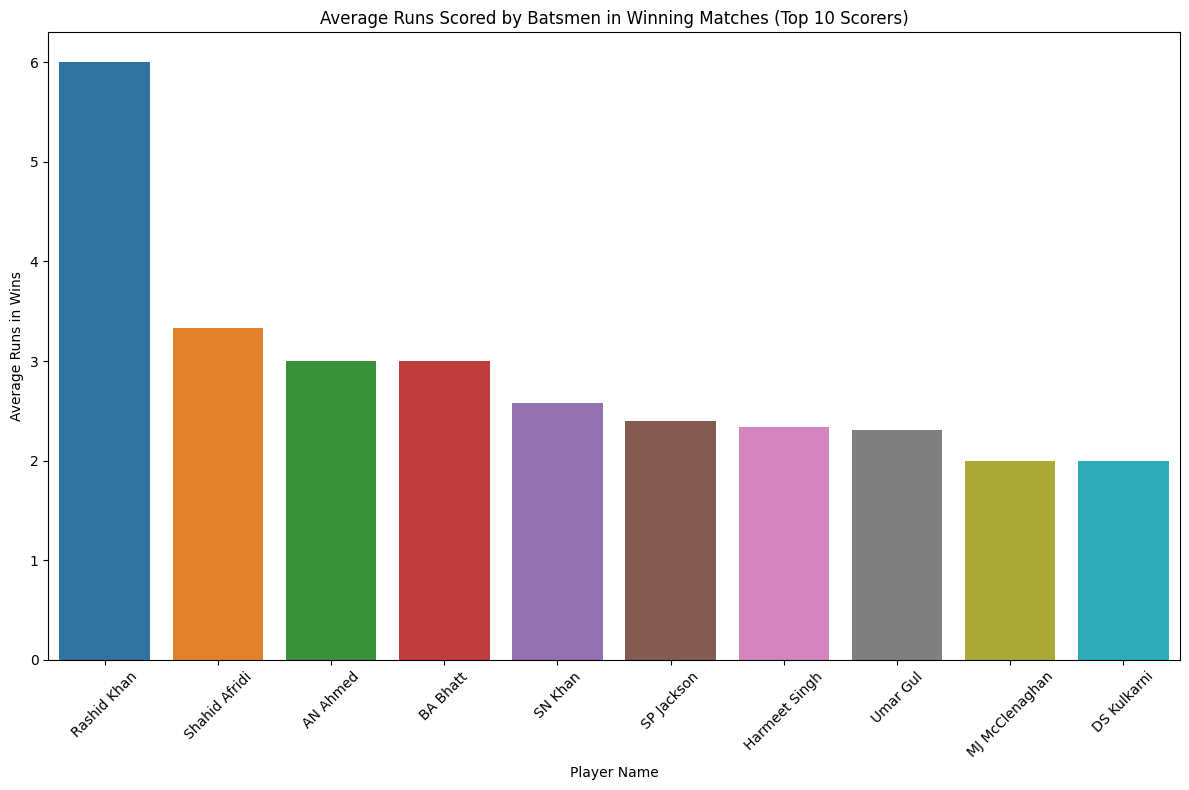

In [0]:


average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:

scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")
scores_by_venue.show()



+--------------------+------------------+-------------+
|          venue_name|     average_score|highest_score|
+--------------------+------------------+-------------+
|   Brabourne Stadium| 326.8181818181818|          399|
|Saurashtra Cricke...|             319.8|          393|
|Punjab Cricket As...|318.85714285714283|          347|
|    Barabati Stadium|313.57142857142856|          404|
|          Green Park|             309.0|          378|
|Maharashtra Crick...|302.53333333333336|          377|
|Rajiv Gandhi Inte...|           302.375|          366|
|Himachal Pradesh ...|301.77777777777777|          372|
|MA Chidambaram St...| 301.4791666666667|          448|
|Sardar Patel Stad...| 299.0833333333333|          385|
|    Wankhede Stadium|298.17543859649123|          435|
|Punjab Cricket As...|297.74285714285713|          430|
|Holkar Cricket St...|             297.4|          377|
|Punjab Cricket As...|             296.0|          380|
|M Chinnaswamy Sta...| 294.2878787878788|       

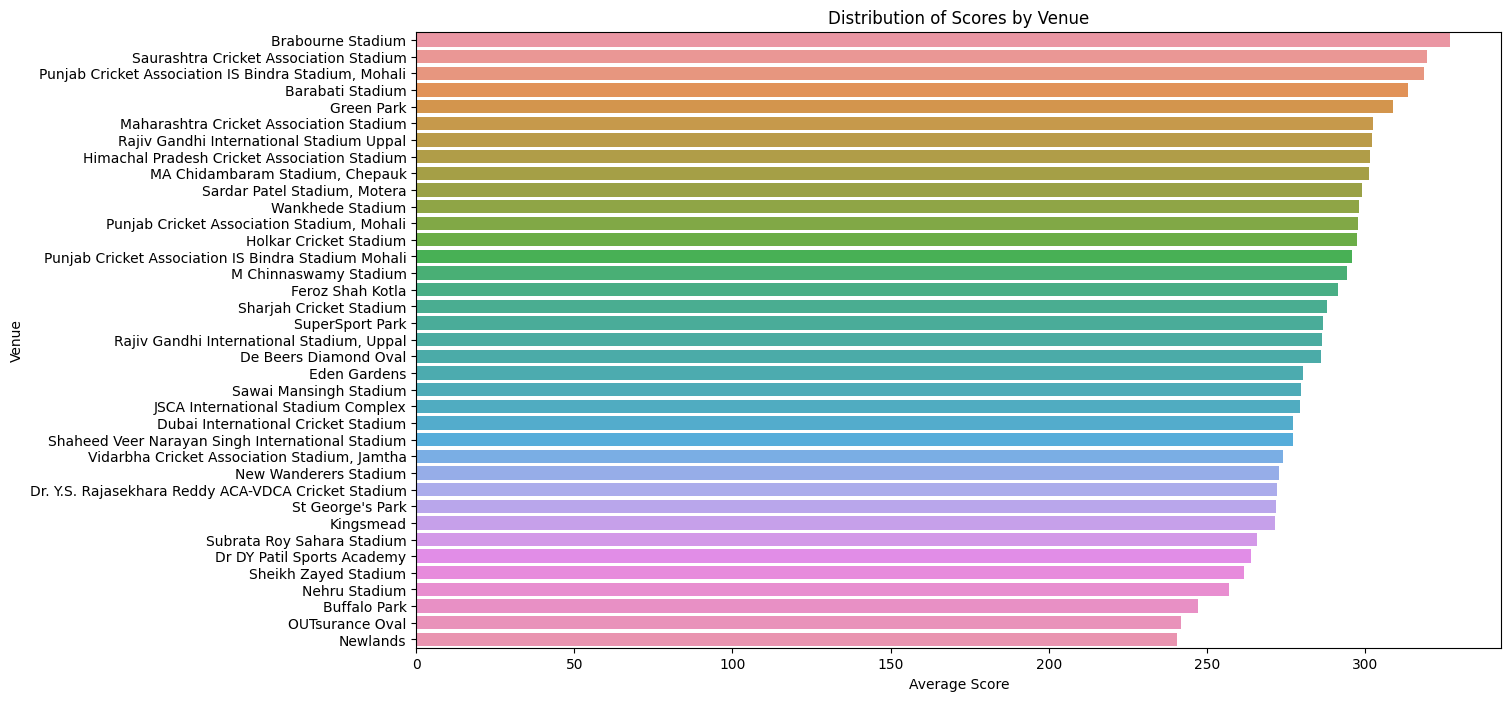

In [0]:


scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()
     

In [0]:
out_frequ = spark.sql ("""
                       select out_type, count(*) as frequency
                       from ball_by_ball
                       where out_type is not null
                       group by out_type""")

In [0]:
out_frequ.show()

+--------------------+---------+
|            out_type|frequency|
+--------------------+---------+
|             run out|      755|
|   caught and bowled|      211|
|                 lbw|      455|
|              bowled|     1382|
|        Keeper Catch|      695|
|        retired hurt|        9|
|              caught|     3678|
|             stumped|      243|
|      Not Applicable|   143013|
|          hit wicket|        9|
|obstructing the f...|        1|
+--------------------+---------+



In [0]:
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")


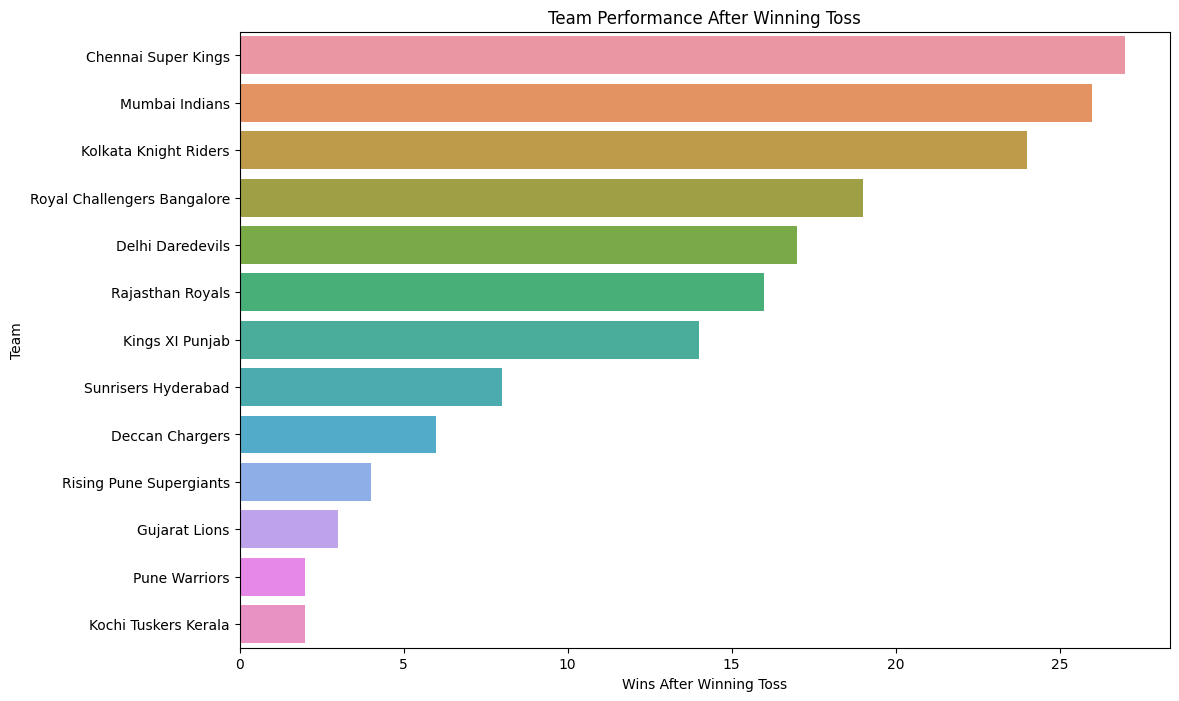

In [0]:
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()
